# Задание №1

In [1]:
from datetime import date

from scipy import interpolate
import matplotlib.pyplot as plt

Запишем значения производительности суперкомпьютера №1 в зависимости от даты: https://top500.org/statistics/perfdevel/.

In [2]:
def fill_dates(start_year, end_year):
    dates = []
    for year in range(start_year, end_year + 1):
        dates += [date(year, 6, 1), date(year, 11, 1)]
    return dates

dates = fill_dates(1993, 2022)
dates.pop()

performances = [59.7, 124.0, 143.4, 170.0, 170.0, 170.0, 220.4, 368.2, 1100.0, 1300.0, 1300.0, 1300.0, 2100.0, 2400.0, 2400.0,
                4900.0, 7200.0, 7200.0, 35900.0, 35900.0, 35900.0, 35900.0, 35900.0, 70700.0, 136800.0, 280600.0, 280600.0,
                280600.0, 280600.0, 478200.0, 1e6, 1.1e6, 1.1e6, 1.8e6, 1.8e6, 2.6e6, 8.2e6, 10.5e6, 16.3e6, 17.6e6, 33.9e6,
                33.9e6, 33.9e6, 33.9e6, 33.9e6, 33.9e6, 93e6, 93e6, 93e6, 93e6, 122.3e6, 143.5e6, 148.6e6, 148.6e6, 415.5e6,
                442e6, 442e6, 442e6, 1.1e9]

len(dates) == len(performances)

True

In [3]:
def date_difference(date1, date2):
    return (date1.year - date2.year) * 12 + date1.month - date2.month

In [4]:
months = [date_difference(date, dates[0]) for date in dates]
months[:5]

[0, 5, 12, 17, 24]

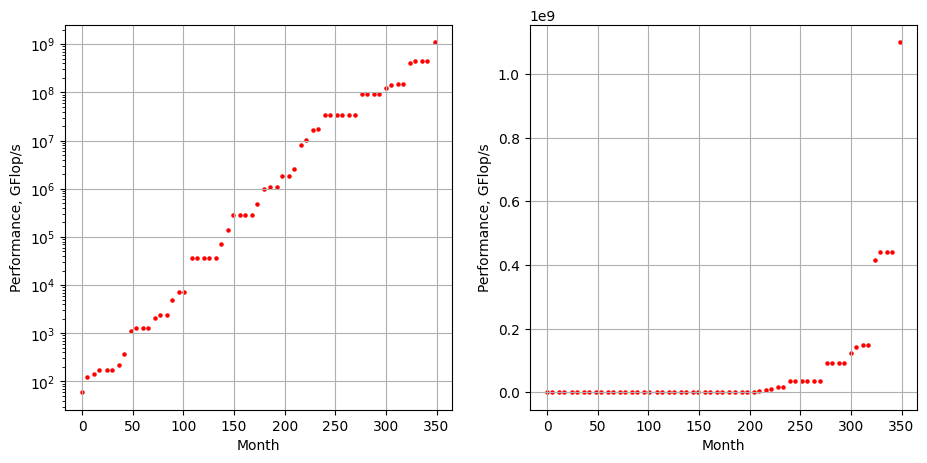

In [5]:
plt.figure(figsize=(11, 5))

ax = plt.subplot(121)
ax.scatter(months, performances, s=5, c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Performance, GFlop/s')
ax.set_yscale('log')
ax.grid()

ax = plt.subplot(122)
ax.scatter(months, performances, s=5, c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Performance, GFlop/s')
ax.grid()

plt.show()

In [6]:
f = interpolate.UnivariateSpline(months, performances)
# f = interpolate.interp1d(months, performances, fill_value='extrapolate')

In [7]:
extended_dates = fill_dates(2022, 2025)
extended_dates = extended_dates[1:]
extended_months = [date_difference(date, dates[0]) for date in extended_dates]
extended_dates[-2:]

[datetime.date(2025, 6, 1), datetime.date(2025, 11, 1)]

In [8]:
total_months = months + extended_months

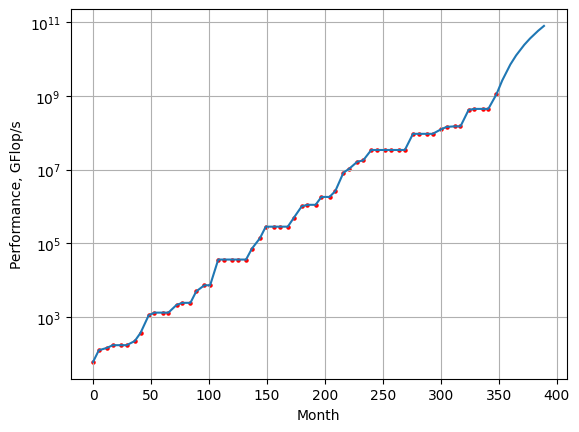

In [9]:
plt.figure()
plt.scatter(months, performances, s=5, c='r')
plt.plot(total_months, f(total_months))
plt.xlabel('Month')
plt.ylabel('Performance, GFlop/s')
plt.gca().set_yscale('log')
plt.grid()
plt.show()

Прогноз для июня 2025 года

In [10]:
print(f"{f(extended_months[-2]) / 1e9} EFlop/s")

58.450801726947006 EFlop/s


Прогноз для ноября 2025 года

In [11]:
print(f"{f(extended_months[-1]) / 1e9} EFlop/s")

79.10389029199978 EFlop/s


# Задание №2

In [12]:
import pandas as pd

In [13]:
data = pd.read_excel('./TOP500_202206.xlsx')
data.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,NaN,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,48553,180047
1,2,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
2,3,NaN,59,3,LUMI,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2022,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe,50908,180048
3,4,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48553,179397
4,5,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49763,179398


In [14]:
data.columns

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Energy Efficiency [GFlops/Watts]', 'Memory',
       'Architecture', 'Processor', 'Processor Technology',
       'Processor Speed (MHz)', 'Operating System', 'OS Family',
       'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation',
       'System Model', 'System Family', 'Interconnect Family', 'Interconnect',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')

In [15]:
consumed_power = data['Power (kW)'].sum()
print(f'Потребляемая мощность: {consumed_power} кВт')

Потребляемая мощность: 340486.45 кВт


Оценка производимого электричества: https://www.iea.org/data-and-statistics/data-tools/monthly-electricity-statistics.

In [17]:
produced_power = 908598.4 * 1e6 / (30 * 24)
print(f'Производимая мощность: {produced_power} кВт')

Производимая мощность: 1261942222.2222223 кВт


Процент потребления

In [18]:
print(f'Процент потребления: {consumed_power / produced_power * 100:.3f} %')

Процент потребления: 0.027 %
